In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import random
import numpy


In [3]:
#Import 2019 data that has already been put
#through filters from 2019data_filter_out

df2019 = pd.read_csv('C:/Users/nateb/Desktop/Insight/Akidolabs/Akido_DPS_Data/work2019.csv')
df=df2019
print(len(df2019))
print(df.PoliceInformationSummary.str.count("homeless").sum())
print(df.PoliceInformationSummary.str.count("transient").sum())

16021
201
399


In [4]:
###Create new column in dataframe that contains value of 1 
###when one the Akido keywords is present


is_classakido = []

key = ['panhandling', 'panhandlers', 'transients', 'transient', 'homeless', 'vagrant', 
       'vagrancy', 'sleeping on','1942','brashere','njmo','cowboy','james brown']    

for i in range(len(df)):

    if any (x in df['PoliceInformationSummary'].values[i] for x in key):
        is_classakido.append(1)
    else:
        is_classakido.append(0)
    
print(np.sum(is_classakido))
df['is_classakido'] = is_classakido

664


In [5]:
###Create new column in dataframe that contains value of 1 
###when one the following keywords is present

is_class1 = []

key = ['panhandling', 'panhandlers', 'panhandler', 'transients', 'transient', 'homeless', 'vagrant', 
       'vagrants', 'vagrancy', 'sleeping on', 'sleeping under','beg','begging','1942','brashere',
      'njmo','cowboy','sleepingon','james brown','mentally','erratic','shopping cart','shopping carts']    

for i in range(len(df)):

    if any (x in df['PoliceInformationSummary'].values[i] for x in key):
        is_class1.append(1)
    else:
        is_class1.append(0)
    
print(np.sum(is_class1))
df['is_class1'] = is_class1
#sub = df2019.loc[(df2019["ccDescription"] == 'Community Contact') & (df2019['is_homeless'] == 1)]
#print(len(sub))
#print(sub['PoliceInformationSummary'].values[0])
#print(sub['PoliceInformationSummary'].values[1])

778


In [8]:
#Count how mnay values of 1 occur in test sample
#alternatively can select from is_class akido
#column for more conservative estimates
#Seed is not set
# Class count
count_class_0, count_class_1 = df['is_class1'].value_counts()

# Divide by class
df_class_0 = df[df['is_class1'] == 0]
df_class_1 = df[df['is_class1'] == 1]

print(count_class_0),print(count_class_1)

15243
778


(None, None)

Random under-sampling:
1    778
0    778
Name: is_class1, dtype: int64


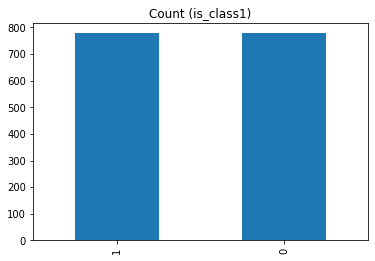

In [9]:
###Balance data using undersampling
###Majority class (not homless) is undersampled, equal number of 0 to 1


df_class_0_under = df_class_0.sample(count_class_1)
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_train_under['is_class1'].value_counts())

df_train_under['is_class1'].value_counts().plot(kind='bar', title='Count (is_class1)');

In [10]:
#Export balanced training set
df_train_under.to_csv (r'C:\Users\nateb\Desktop\Insight\Akidolabs\Akido_DPS_Data\train_1556.csv', 
                        index = None, header=True) 